In [24]:
# ToDo
# ДЗ - 7 блокнотов сделать (всего 7)
# В понедельник выложат вопросы в github.com/iroli
# Сделать все до следующего СПЗ

+ один блокнот с памятью (суть: модель должна помнить предыдущие ответы, которые давал пользователь,
                          например, как его зовут)

s10 - первая ссылка (1_Advanced_Text_Generation_Techniques_and_Tools_with_assignments)
https://drive.google.com/file/d/123Tk2tMDTm11KOei3E9fEnjjdcPWzbZf/view?usp=sharing

Скинуть все ссылки в ЛК MUIV

SyntaxError: invalid decimal literal (2209961247.py, line 9)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


###  Вариант 2. Практические задания к блокноту «Multimodal Large Language Models»:

**Задание 1: Мультимодальный поиск изображений**  
- Используя модель CLIP, реализуйте функцию мультимодального поиска изображений по текстовому запросу в заранее подготовленной базе изображений (не менее 10 изображений).  
- Продемонстрируйте работу функции на 3 разных текстовых запросах и выведите наиболее релевантные изображения.

**Задание 2: Оценка схожести текстов и изображений**  
- Выберите 5 различных изображений и напишите для каждого по два описания: одно корректное и одно намеренно неправильное.  
- Используя модель CLIP, вычислите метрику сходства для каждого описания с соответствующим изображением. Сделайте выводы о качестве модели на основе результатов.

**Задание 3: Визуальная кластеризация**  
- Подготовьте набор изображений одной общей тематики (например, животные, автомобили, природа). Минимум 15 изображений.  
- Реализуйте кластеризацию этих изображений с помощью эмбеддингов модели CLIP. Визуализируйте полученные кластеры и интерпретируйте результаты.


In [ ]:
сгенерируй 15 промтов для изображений, часть изображений должны пересекаться по смыслу

Промты для изображений
Вот 15 промтов для создания изображений, некоторые из которых могут пересекаться по смыслу:

    Тихий лес на рассвете, освещенный мягким золотым светом.
    Современный город в ночное время, сверкающий огнями и отражениями в воде.
    Древний замок на вершине холма, окруженный туманом и загадочными тенями.
    Космический пейзаж с яркими планетами и звездами на фоне бескрайних просторов.
    Пейзаж морского побережья с волнами, разбивающимися о скалы на закате.
    Сад с цветущими вишнями и бабочками, порхающими среди цветов.
    Старинный маяк на скалистом берегу, с бушующим морем и облаками.
    Горный пейзаж с озером, отражающим горы на фоне заката.
    Футуристический город с летающими автомобилями и высокими зданиями.
    Оживленный рынок в тропическом городе с яркими фруктами и местными жителями.
    Мифическое существо, обитающее в таинственном лесу, освещенном лунным светом.
    Спокойное озеро с каякером, отражающим окружающие горы.
    Гармония природы и технологий: лес с высокими деревьями и солнечными панелями.
    Ночной небоскреб с небесной лестницей, ведущей в облака.
    Путешественник с рюкзаком на фоне величественных гор с рассветом.

Эти промты вдохновляют на создание разнообразных изображений и могут перекликаться по темам, таким как природа, технологии и мифология!

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
imgs = [Image.open(f'img_dataset/{i}.jpg').convert('RGB') for i in range(1, 16)]

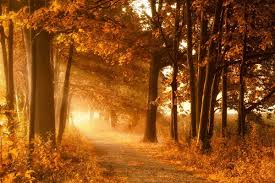

In [4]:
imgs[0]

In [4]:
# Load model for text
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel

model_id = "openai/clip-vit-base-patch32"

# Load a tokenizer to preprocess the text
clip_tokenizer = CLIPTokenizerFast.from_pretrained(model_id)

# Load a processor to preprocess the images
clip_processor = CLIPProcessor.from_pretrained(model_id)

# Main model for generating text and image embeddings
model = CLIPModel.from_pretrained(model_id)

In [5]:
def create_text_embeddings(text):
  inputs = clip_tokenizer(text, return_tensors="pt")
  # clip_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
  text_embedding = model.get_text_features(**inputs)
  return text_embedding

In [9]:
t1 = create_text_embeddings('The quiet forest at dawn is illuminated by a soft black light')
t1.shape

torch.Size([1, 512])

In [6]:
def create_image_embeddings(img):
  processed_image = clip_processor(
    text=None, images=img, return_tensors='pt')['pixel_values']
  image_embedding = model.get_image_features(processed_image)
  return image_embedding

In [10]:
img1 = create_image_embeddings(imgs[0])
img1.shape

torch.Size([1, 512])

In [7]:
def compare(text_embedding, image_embedding):
  text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
  image_embedding /= image_embedding.norm(dim=-1, keepdim=True)
  text_embedding = text_embedding.detach().cpu().numpy()
  image_embedding = image_embedding.detach().cpu().numpy()
  score = text_embedding @ image_embedding.T
  return score

In [11]:
compare(t1, img1)

array([[0.25384662]], dtype=float32)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(t1.detach().cpu().numpy(), img1.detach().cpu().numpy())
sim_matrix

array([[0.25384668]], dtype=float32)

In [12]:
img_embs = [create_image_embeddings(i) for i in imgs]

In [14]:
text_emb = create_text_embeddings('The quiet forest at dawn is illuminated by a soft black light')
results = []

for i, img in enumerate(img_embs, start=1):
  result = compare(text_emb, img)
  results.append((result, i))

results = sorted(results, reverse=True)
img_ids = [i[1] for i in results[:4]]
img_ids

[6, 1, 2, 11]

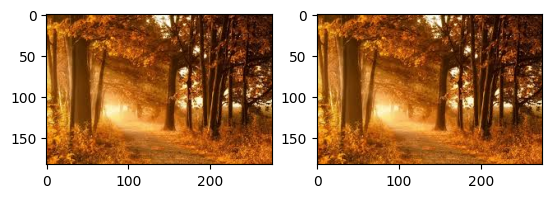

In [15]:
plt.subplot(2, 2, 4)
plt.imshow(imgs[0])
plt.subplot(2, 2, 3)
plt.imshow(imgs[0])

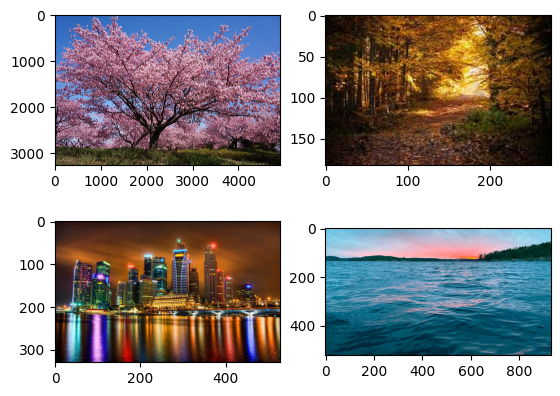

In [18]:
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(imgs[img_ids[i]])

In [19]:
def find_imgs(text):
  text_emb = create_text_embeddings(text)
  results = []

  for i, img in enumerate(img_embs, start=1):
    result = compare(text_emb, img)
    results.append((result, i))

  results = sorted(results, reverse=True)
  img_ids = [i[1] for i in results[:4]]

  for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(imgs[img_ids[i]])

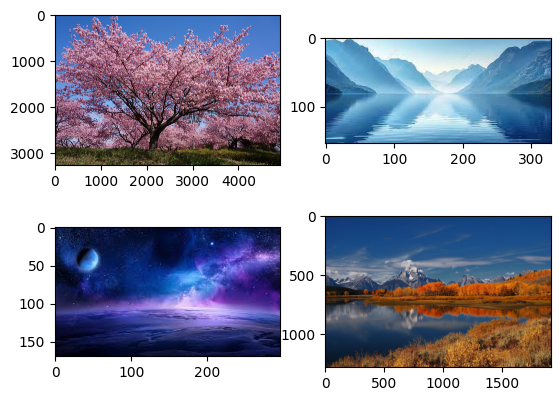

In [20]:
find_imgs('Space landscape')

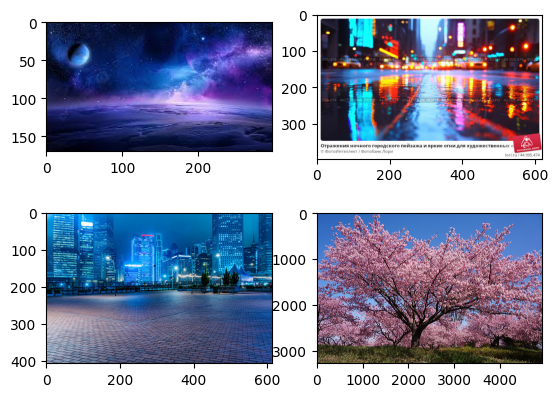

In [21]:
find_imgs('Futuristic city')

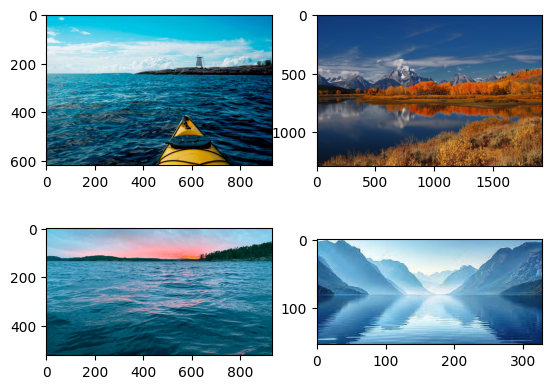

In [22]:
find_imgs('Big lake')

IndexError: list index out of range

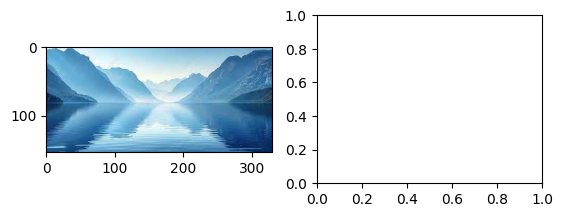

In [23]:
find_imgs('elephant')

# Task 2

**Задание 2: Оценка схожести текстов и изображений**  
- Выберите 5 различных изображений и напишите для каждого по два описания: одно корректное и одно намеренно неправильное.  
- Используя модель CLIP, вычислите метрику сходства для каждого описания с соответствующим изображением. Сделайте выводы о качестве модели на основе результатов.

In [22]:
def similarity(img, texts):
    tmp = Image.open(f'img_dataset/{img}.jpg')
    plt.imshow(tmp)
    img = create_image_embeddings(tmp)
    texts_emb = [create_text_embeddings(i) for i in texts]

    comp = [(texts[i] ,compare(img, emb)[0]) for i, emb in enumerate(texts_emb)]

    print(comp)

[('forest', array([0.26266807], dtype=float32)), ('man', array([0.20291263], dtype=float32))]


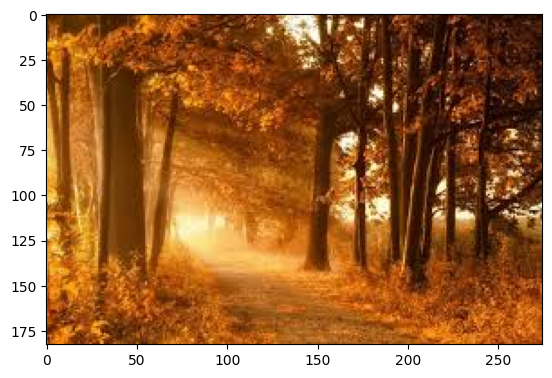

In [23]:
similarity(1, ['forest', 'man'])

[('A quiet forest at dawn, illuminated by soft golden light.', array([0.28280035], dtype=float32)), ('man driving car', array([0.18049404], dtype=float32))]


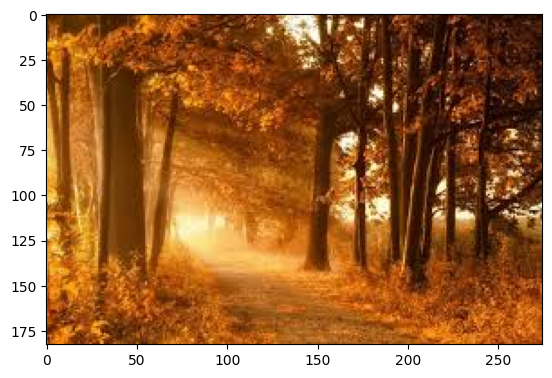

In [26]:
similarity(1, ['A quiet forest at dawn, illuminated by soft golden light.', 'man driving car'])

[('A modern city at night, sparkling with lights and reflections in the water', array([0.2903638], dtype=float32)), ('garden with rare plants on a clear summer day', array([0.11583927], dtype=float32))]


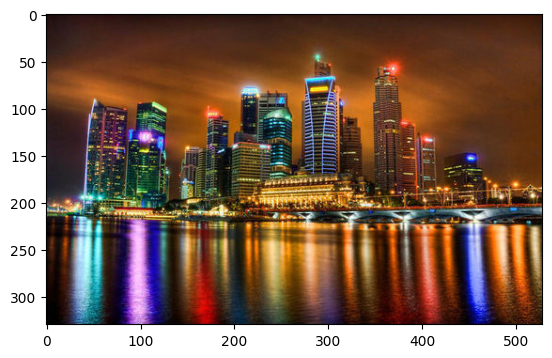

In [30]:
similarity(3, ['A modern city at night, sparkling with lights and reflections in the water', 
               'garden with rare plants on a clear summer day'])

[('Mountain landscape with lake reflecting mountains at sunset', array([0.27165204], dtype=float32)), ('Huge mountains covered in night fog', array([0.23737335], dtype=float32))]


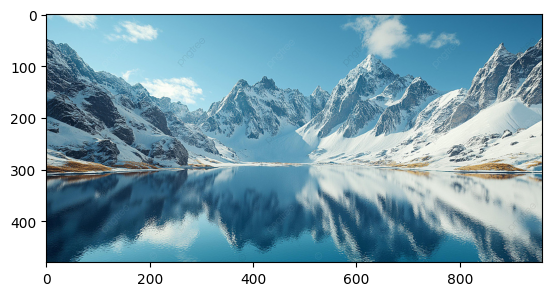

In [31]:
similarity(8, ['Mountain landscape with lake reflecting mountains at sunset',
               'Huge mountains covered in night fog'])

[('Calm lake with a kayaker', array([0.271166], dtype=float32)), ('Hendless sea expanses, and in the distance a ship is located', array([0.22623694], dtype=float32))]


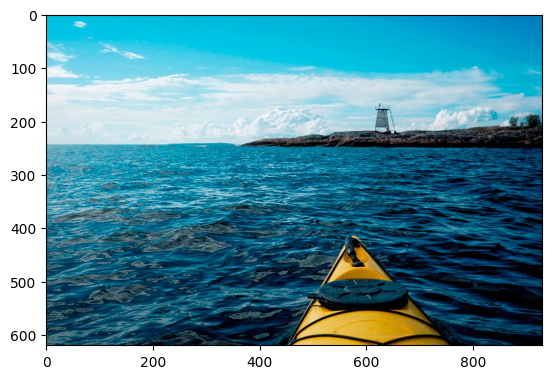

In [32]:
similarity(13, ['Calm lake with a kayaker',
               'Hendless sea expanses, and in the distance a ship is located'])

[('A traveler with a backpack at a train station', array([0.2982012], dtype=float32)), ('Scene from harry potter when he goes to hogwarts on the train', array([0.20597468], dtype=float32))]


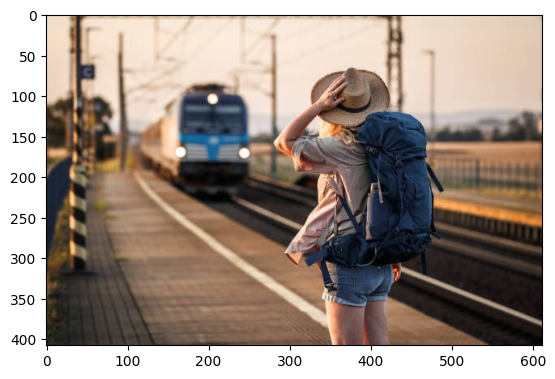

In [34]:
similarity(15, ['A traveler with a backpack at a train station',
               'Scene from harry potter when he goes to hogwarts on the train'])

[('Space landscape with bright planets and stars against the backdrop of endless expanses', array([0.29344195], dtype=float32)), ('endless space', array([0.27394134], dtype=float32)), ('black hole is space', array([0.26427698], dtype=float32)), ('earth', array([0.25613138], dtype=float32)), ('river', array([0.22446562], dtype=float32)), ('forest', array([0.2149889], dtype=float32)), ('car', array([0.2063779], dtype=float32))]


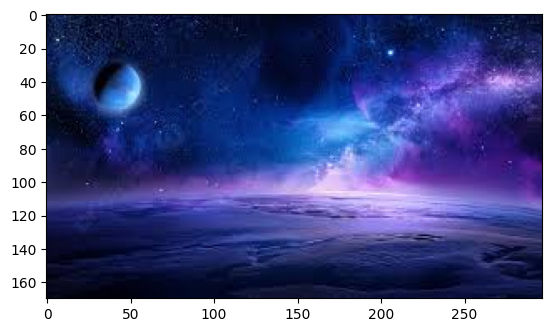

In [41]:
similarity(6, ['Space landscape with bright planets and stars against the backdrop of endless expanses',
               'endless space', 'black hole is space', 'earth', 'river', 'forest', 'car'])

# Task 3

**Задание 3: Визуальная кластеризация**  
- Подготовьте набор изображений одной общей тематики (например, животные, автомобили, природа). Минимум 15 изображений.  
- Реализуйте кластеризацию этих изображений с помощью эмбеддингов модели CLIP. Визуализируйте полученные кластеры и интерпретируйте результаты.


In [48]:
# animals
imgs = [Image.open(f'img_dataset_1/{i}.jpg').convert('RGB') for i in range(18)]

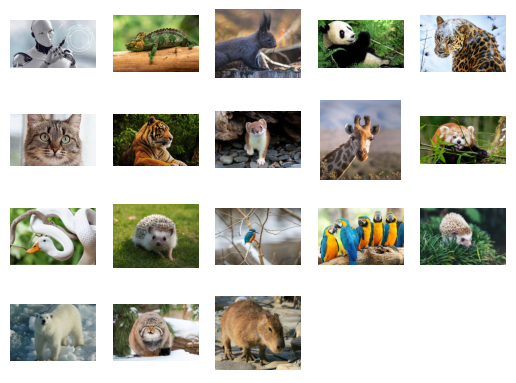

In [52]:
for i in range(4):
    for j in range(5):
        id_ = i*5+j
        plt.subplot(4, 5, id_+1)
        plt.axis("off")
        try:
            plt.imshow(imgs[id_])
        except:
            pass

In [61]:
img_emb = [create_image_embeddings(i).detach().numpy()[0] for i in imgs]

In [62]:
img_emb[0].shape

(512,)

In [88]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(img_emb)
kmeans.labels_

array([1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0], dtype=int32)

Cluster 0
Cluster 1
Cluster 2


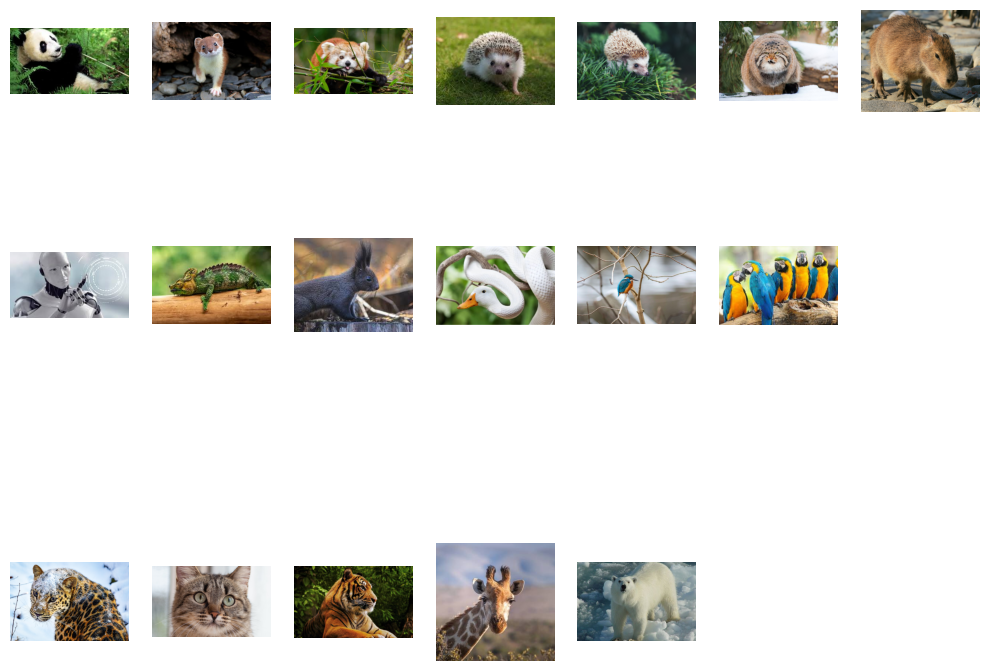

In [95]:
idx = 1
max_ = 10
plt.figure(figsize=(18, 16))
for i in range(n_clusters):
    idx = i * max_ + 1
    
    print('Cluster', i)
    amount = list(kmeans.labels_).count(i)

    for j, value in enumerate(kmeans.labels_):
        if value == i:
            plt.subplot(amount, max_, idx)
            plt.axis("off")
            plt.imshow(imgs[j])
            idx += 1